In [1]:
import numpy as np
import pandas as pd
import lasagne
import theano
import theano.tensor as T
import random
import time
import connect_four as cccc
import sys
#import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display


ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
ERROR:theano.sandbox.cuda:nvcc compiler not found on $PATH. Check your nvcc installation and try again.


In [6]:
#initialization
 
nets = []
play_nets = []
activation = lasagne.nonlinearities.tanh

hidden_units = 100
net1_in =  lasagne.layers.InputLayer(shape=(None,42))
net1_hid = lasagne.layers.DenseLayer(net1_in, num_units = hidden_units, nonlinearity = activation)
net1_out = lasagne.layers.DenseLayer(net1_hid, num_units = 1, nonlinearity = activation)
test = np.load('TD_cccc_100_1_6million(1).npz')['arr_0']
lasagne.layers.set_all_param_values(net1_out,test)
nets.append(net1_out)

hidden_units = 36
num_filters = 10
net2_in = lasagne.layers.InputLayer(shape=(None,42))
net2_shape = lasagne.layers.ReshapeLayer(net2_in, (-1, 1, 6, 7))
net2_conv1 = lasagne.layers.Conv2DLayer(net2_shape, num_filters = num_filters, filter_size = 3,
                                         W=lasagne.init.GlorotUniform(), nonlinearity = activation)
net2_conv2 = lasagne.layers.Conv2DLayer(net2_conv1, num_filters = num_filters, filter_size = 3,
                                             W=lasagne.init.GlorotUniform(), nonlinearity = activation)
net2_hid1 = lasagne.layers.DenseLayer(net2_conv2, num_units=hidden_units,W=lasagne.init.GlorotUniform(),
                                          nonlinearity = activation)
net2_hid2= lasagne.layers.DenseLayer(net2_hid1, num_units=hidden_units,W=lasagne.init.GlorotUniform(),
                                              nonlinearity = activation)
net2_out = lasagne.layers.DenseLayer(net2_hid2,
                                  num_units=1, nonlinearity = activation)
test = np.load('TD_cccc_cnn_100k(2).npz')['arr_0']
lasagne.layers.set_all_param_values(net2_out,test)
#nets.append(net2_out)

hidden_units = 36
num_filters = 10
net3_in = lasagne.layers.InputLayer(shape=(None,42))
net3_shape = lasagne.layers.ReshapeLayer(net3_in, (-1, 1, 6, 7))
net3_conv1 = lasagne.layers.Conv2DLayer(net3_shape, num_filters = num_filters, filter_size = 3,
                                         W=lasagne.init.GlorotUniform(), nonlinearity = activation)
net3_conv2 = lasagne.layers.Conv2DLayer(net3_conv1, num_filters = num_filters, filter_size = 3,
                                             W=lasagne.init.GlorotUniform(), nonlinearity = activation)
net3_hid1 = lasagne.layers.DenseLayer(net3_conv2, num_units=hidden_units,W=lasagne.init.GlorotUniform(),
                                          nonlinearity = activation)
net3_hid2= lasagne.layers.DenseLayer(net3_hid1, num_units=hidden_units,W=lasagne.init.GlorotUniform(),
                                              nonlinearity = activation)
net3_out = lasagne.layers.DenseLayer(net3_hid2,
                                  num_units=1, nonlinearity = activation)
test = np.load('TD_cccc_cnn_1_5_million(3).npz')['arr_0']
lasagne.layers.set_all_param_values(net3_out,test)
nets.append(net3_out)

hidden_units = 100
net4_in =  lasagne.layers.InputLayer(shape=(None,42))
net4_hid = lasagne.layers.DenseLayer(net4_in, num_units = hidden_units, nonlinearity = activation)
net4_out = lasagne.layers.DenseLayer(net4_hid, num_units = 1, nonlinearity = activation)
test = np.load('TD_cccc_nn_100_trained17k(4).npz')['arr_0']
lasagne.layers.set_all_param_values(net4_out,test)
nets.append(net4_out)

hidden_units = 16
num_filters = 3
net5_in = lasagne.layers.InputLayer(shape=(None,42))
net5_shape = lasagne.layers.ReshapeLayer(net5_in, (-1, 1, 6, 7))
net5_conv1 = lasagne.layers.Conv2DLayer(net5_shape, num_filters = num_filters, filter_size = 4,
                                         W=lasagne.init.GlorotUniform(), nonlinearity = activation)
net5_hid1 = lasagne.layers.DenseLayer(net5_conv1, num_units=hidden_units,W=lasagne.init.GlorotUniform(),
                                          nonlinearity = activation)
net5_out = lasagne.layers.DenseLayer(net5_hid1,
                                  num_units=1, nonlinearity = activation)
test = np.load('TD_cccc_cnn_small(5).npz')['arr_0']
lasagne.layers.set_all_param_values(net5_out,test)
#nets.append(net5_out)

hidden_units = 25
num_filters = 8
net6_in = lasagne.layers.InputLayer(shape=(None,42))
net6_shape = lasagne.layers.ReshapeLayer(net6_in, (-1, 1, 6, 7))
net6_conv1 = lasagne.layers.Conv2DLayer(net6_shape, num_filters = num_filters, filter_size = 4,
                                         W=lasagne.init.GlorotUniform(), nonlinearity = activation)
net6_hid1 = lasagne.layers.DenseLayer(net6_conv1, num_units=hidden_units,W=lasagne.init.GlorotUniform(),
                                          nonlinearity = activation)
net6_out = lasagne.layers.DenseLayer(net6_hid1,
                                  num_units=1, nonlinearity = activation)
test = np.load('TD_cccc_cnn4_660k(6).npz')['arr_0']
lasagne.layers.set_all_param_values(net6_out,test)
nets.append(net6_out)

hidden_units = 64
net7_in =  lasagne.layers.InputLayer(shape=(None,42))
net7_hid = lasagne.layers.DenseLayer(net7_in, num_units = hidden_units, nonlinearity = activation)
net7_out = lasagne.layers.DenseLayer(net7_hid, num_units = 1, nonlinearity = activation)
test = np.load('TD_cccc_nn_64(7).npz')['arr_0']
lasagne.layers.set_all_param_values(net7_out,test)
nets.append(net7_out)

hidden_units = 50
net8_in =  lasagne.layers.InputLayer(shape=(None,42))
net8_hid1 = lasagne.layers.DenseLayer(net8_in, num_units = hidden_units, nonlinearity = activation)
net8_hid2 = lasagne.layers.DenseLayer(net8_hid1, num_units = hidden_units, nonlinearity = activation)
net8_hid3 = lasagne.layers.DenseLayer(net8_hid2, num_units = hidden_units, nonlinearity = activation)
net8_hid4 = lasagne.layers.DenseLayer(net8_hid3, num_units = hidden_units, nonlinearity = activation)
net8_out = lasagne.layers.DenseLayer(net8_hid4, num_units = 1, nonlinearity = activation)
test = np.load('TD_cccc_nn50x4-500k(8).npz')['arr_0']
lasagne.layers.set_all_param_values(net8_out,test)
nets.append(net8_out)

hidden_units = 120
net9_in =  lasagne.layers.InputLayer(shape=(None,42))
net9_hid = lasagne.layers.DenseLayer(net9_in, num_units = hidden_units, nonlinearity = activation)
net9_out = lasagne.layers.DenseLayer(net9_hid, num_units = 1, nonlinearity = activation)
test = np.load('TD_cccc_nn120_300k(9).npz')['arr_0']
lasagne.layers.set_all_param_values(net9_out,test)
#nets.append(net9_out)

hidden_units = 100
net10_in =  lasagne.layers.InputLayer(shape=(None,42))
net10_hid = lasagne.layers.DenseLayer(net10_in, num_units = hidden_units, nonlinearity = activation)
net10_out = lasagne.layers.DenseLayer(net10_hid, num_units = 1, nonlinearity = activation)
test = np.load('TD_cccc_nn100_144k(really good)(10).npz')['arr_0']
lasagne.layers.set_all_param_values(net10_out,test)
nets.append(net10_out)

hidden_units = 100
net11_in =  lasagne.layers.InputLayer(shape=(None,42))
net11_hid = lasagne.layers.DenseLayer(net11_in, num_units = hidden_units, nonlinearity = activation)
net11_out = lasagne.layers.DenseLayer(net11_hid, num_units = 1, nonlinearity = activation)
test = np.load('TD_cccc_n100_100k(11).npz')['arr_0']
lasagne.layers.set_all_param_values(net11_out,test)
nets.append(net11_out)

X_sym = T.matrix()
y_sym = T.matrix()
outputs = [lasagne.layers.get_output(net, X_sym) for net in nets]
value_funs = [theano.function([X_sym],output) for output in outputs]


In [ ]:
for net in nets:
    test = lasagne.layers.get_all_param_values(net)
    print sum([test[i].size for i,_ in enumerate(test)])

In [ ]:
test = np.load('TD_cccc_n100_100k(11).npz')['arr_0']

for item in test:
    print item.shape
    print item.size
    
print sum([test[i].size for i,_ in enumerate(test)])

In [7]:
def value_move(board,active_turn,output_funs,exploration = 0,noise = 0):
    X_sym = theano.tensor.matrix()
    y_sym = theano.tensor.ivector()
    dummy_board = np.copy(board)
    options = cccc.available_moves(dummy_board)
    
    
    if exploration > random.random():
        move = random.choice(options) 
    else:
        moves = np.zeros(7)
        for output_fun in output_funs:
            move_values = np.zeros(7)
            for choice in options:
                dummy_board = active_turn * board[:]
                dummy_board[np.where(dummy_board[:,choice]==0)[0][-1],choice] = 1
                reshapeable = np.copy(dummy_board)
                move_values[choice] = -1 * output_fun(-1* reshapeable.reshape(1,42))+ noise * np.random.random()
            available_move_values = np.array([move_values[move] for move in options])

            move = options[available_move_values.argmax(-1)]
            moves[move] += 1
        
        move = np.argmax(moves)
    return move + 1


class nn_ai:
    
    def __init__(self,output_fun, net = 'value',exploration = 0,noise = 0):
        self.output_fun = output_fun
        self.exploration = exploration
        self.noise = noise
        self.net = net
    
    def make_move(self,board,active_turn):
#         if self.net == 'policy':
#             move = policy_move(board,active_turn,self.output_fun,self.exploration)
        if self.net == 'value':
            move = value_move(board,active_turn,self.output_fun,self.exploration,self.noise)
        return move
    
    
def alpha_beta_move(board,active_turn,depth,evaluation,alpha = 2):
    swap_dict = {1:-1,-1:1}
    dummy_board = np.zeros((6,7))
    dummy_board[:] = board[:]
    options = cccc.available_moves(board)
    random.shuffle(options)
    if len(options) == 1:
        dummy_board[np.where(dummy_board[:,options[0]]==0)[0][-1],options[0]] = active_turn
        if cccc.winner(dummy_board):
            return (1,options[0]+1)
        else:
            return (0,options[0]+1)
    if depth ==0:
        best_value = -2
        for x in options:
            height = np.where(dummy_board[:,x]==0)[0][-1]
            dummy_board[height,x] = active_turn
            eval_board = evaluation(dummy_board*active_turn)
            if  eval_board > best_value:
                best_value = eval_board
                candidate_move = x + 1
            dummy_board[height,x] = 0
        return (best_value, candidate_move)

    best_value = -2
    candidate_move = None
    for x in options:
        height = np.where(dummy_board[:,x]==0)[0][-1]
        dummy_board[height,x] = active_turn
        if cccc.winner(dummy_board):
            return (1, x+1)
        (opp_value,opp_move) = alpha_beta_move(dummy_board,swap_dict[active_turn],depth-1,evaluation,-best_value)
        if -opp_value > best_value:
            candidate_move = x+1
            best_value = -opp_value
        if -opp_value >= alpha:
            #print (options, x, best_value, alpha)
            break
        dummy_board[height,x] = 0

    return (best_value, candidate_move)

class alpha_beta:
    def __init__(self,depth, evaluation = lambda x: 0,noise = 0):
        self.depth = depth
        self.evaluation = lambda x : evaluation(x) + noise* (random.random()-0.5)
    def make_move(self,board,active_turn):
        #print (board,active_turn,self.depth)
        return alpha_beta_move(board,active_turn,self.depth, self.evaluation)[1]

class alpha_beta_meta:
    def __init__(self,depth, evaluators,noise = 0):
        self.depth = depth
        self.noise = noise
        self.evaluators = evaluators
        
    def make_move(self,board,active_turn):
        # print [float(thing(np.zeros((6,7)).reshape(1,42))) for thing in self.evaluators]
        #print (board,active_turn,self.depth)
        moves = []
        evaluator_list = []
        for evaluate in self.evaluators:
            evaluation = lambda x : float(evaluate(x) + self.noise* (random.random()-0.5))
            evaluator_list.append(evaluation)
            moves.append(alpha_beta_move(board,active_turn,self.depth, evaluation)[1])
        return random.choice(np.argwhere(np.bincount(moves) == np.amax(np.bincount(moves))))

    
def game_over(board):
    return cccc.winner(board) or cccc.is_full(board)


def monte_carlo(board,hash_,runs = 100,player = 1):
    dummy_board = np.copy(board)
    if hash_.get(tuple(dummy_board.reshape(42))):
        results = hash_.get(tuple(dummy_board.reshape(42)))
    else:
        results = {'plays':0,'score':0}
        hash_[tuple(dummy_board.reshape(42))] = results
    while results['plays'] < runs:
        dummy_board = np.copy(board)
        hash_list = [tuple(dummy_board.reshape(42))]
        current_player = player
        if game_over(dummy_board):
            score = cccc.winner(dummy_board)
        while not game_over(dummy_board):
            move = random.choice(cccc.available_moves(dummy_board))
            dummy_board[np.where(dummy_board[:,move]==0)[0][-1],move] = current_player
            if not hash_.get(tuple(dummy_board.reshape(42))):
                hash_[tuple(dummy_board.reshape(42))] = {'plays':0, 'score':0}
            if hash_[tuple(dummy_board.reshape(42))]['plays'] >= runs:
                score = hash_[tuple(dummy_board.reshape(42))]['score'] / float(hash_[tuple(dummy_board.reshape(42))]['plays'])
                break
            else:
                hash_list.append(tuple(dummy_board.reshape(42)))
                score = cccc.winner(dummy_board)
                current_player *= -1
        results['plays'] +=1
        results['score'] +=score
        for item in hash_list:
            hash_[item]['plays']+=1
            hash_[item]['score']+=score
    return results['score']/float(results['plays'])
            
            
def reshape_function(function):
    def return_function(board):
        return function(board.reshape(1,42))
    return return_function
    
def monte_carlo_player(hash_={}, runs = 100):
    def return_function(board):
        return monte_carlo(board, hash_,runs)
    return return_function

In [4]:
players =[]
hash_={}
players.append(alpha_beta(0, reshape_function(value_funs[3]),noise = 0.1))
players.append(alpha_beta(2, reshape_function(value_funs[3]),noise = 0.1))
players.append(alpha_beta_meta(2,[reshape_function(value_fun) for value_fun in value_funs],noise = 0.1))
players.append(alpha_beta(0))
players.append(alpha_beta(2))
players.append(alpha_beta(4))
players.append(alpha_beta(6))
players.append(alpha_beta(0, monte_carlo_player(hash_={}, runs = 25)))
players.append(alpha_beta(0, monte_carlo_player(hash_={}, runs = 100)))


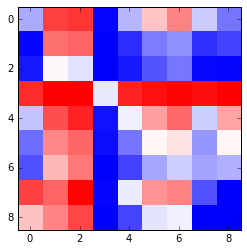

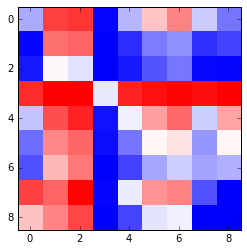

In [14]:
# wins = np.zeros((len(players), len(players)))
# ties= np.zeros((len(players), len(players)))
# losses = np.zeros((len(players), len(players)))
# score = np.zeros((len(players), len(players)))
# p1_time = np.zeros((len(players), len(players)))
# p2_time =  np.zeros((len(players), len(players)))
# for i, player_1 in enumerate(players):
for i in range(8,9):
    player_1 = players[i]
#     for j, player_2 in enumerate(players):
    for j in range(4,9):
        player_2 = players[j]
        t0 = time.clock()
        counter = 0
        while time.clock() - t0 < 600 and counter <999:
            result = cccc.play(player_1, player_2)
            counter +=1
            if result.winner ==1:
                wins[i,j] +=1
            if result.winner == 0:
                ties[i,j] +=1
            if result.winner == -1:
                losses[i,j] +=1
            p1_time[i,j] += result.p1_time
            p2_time[i,j] += result.p2_time
            score[i,j] = (wins[i,j] - losses[i,j])/ float(wins[i,j] + ties[i,j] + losses[i,j])
            sys.stdout.write('\r score is {:3d} - {:3d} - {:3d}, player 1 time {:3.2f}s, player 2 time {:3.2f}s'.format(
                    int(wins[i,j]),int(ties[i,j]),int(losses[i,j]),p1_time[i,j], p2_time[i,j]))
            sys.stdout.flush()
#        plt.title('{:3.2f}s  {:3d}'.format(time.clock() - t0,counter))
        plt.imshow(score, interpolation = 'nearest', cmap = 'bwr_r', vmin = -1, vmax = 1)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        

In [16]:
np.savez('short_tourney_data_final',[wins,ties,losses,score, p1_time, p2_time])

In [15]:
np.set_printoptions(precision=2)
print np.round(p2_time,1)

[[  4.50e+00   2.19e+02   5.95e+02   4.00e-01   5.07e+01   5.90e+02
    6.02e+02   5.62e+02   3.78e+01]
 [  3.10e+00   2.22e+02   5.26e+02   4.00e-01   4.65e+01   4.62e+02
    5.86e+02   2.19e+02   4.27e+02]
 [  1.70e+00   6.64e+01   2.92e+02   3.00e-01   2.24e+01   1.84e+02
    4.97e+02   1.48e+02   3.41e+02]
 [  2.90e+00   1.24e+02   5.98e+02   9.00e-01   5.04e+01   5.67e+02
    6.07e+02   5.99e+02   6.06e+02]
 [  4.30e+00   1.93e+02   5.73e+02   7.00e-01   6.91e+01   5.46e+02
    5.95e+02   5.88e+02   6.14e+02]
 [  4.30e+00   1.28e+02   4.08e+02   7.00e-01   4.67e+01   2.94e+02
    5.47e+02   4.82e+02   5.91e+02]
 [  4.00e-01   1.60e+01   1.08e+02   1.00e-01   4.80e+00   4.97e+01
    3.02e+02   1.72e+02   3.94e+02]
 [  2.70e+00   1.94e+02   5.66e+02   3.00e-01   1.46e+01   1.38e+02
    4.68e+02   1.10e+01   1.18e+01]
 [  3.50e+00   8.29e+01   3.66e+02   1.00e-01   3.80e+00   3.84e+01
    2.77e+02   1.10e+00   1.40e+00]]


In [13]:
test=np.load('short_tourney_data.npz')
(wins,ties,losses,score,p1_time,p2_time) =test['arr_0']


In [10]:
wins+losses+ties

array([[ 999.,  999.,  526.,  999.,  999.,  790.,   73.,  999.,  999.],
       [ 999.,  999.,  353.,  999.,  999.,  588.,   69.,  999.,  888.],
       [ 555.,  302.,  165.,  765.,  437.,  248.,   67.,  401.,  229.],
       [ 999.,  999.,  685.,  999.,  999.,  999.,   98.,  288.,   65.],
       [ 999.,  999.,  391.,  999.,  999.,  731.,   74.,  206.,   45.],
       [ 930.,  590.,  252.,  999.,  773.,  348.,   64.,  169.,   28.],
       [  92.,   73.,   68.,  110.,   81.,   63.,   32.,   56.,   29.],
       [ 999.,  999.,  428.,  555.,  276.,  199.,   60.,  999.,  999.],
       [ 999.,  514.,  281.,  131.,    0.,    0.,    0.,    0.,    0.]])

In [20]:
print test['arr_0'][0], test['arr_0'][3]

[[ 69.  11.   1.  98.  62.   7.   1.   0.   0.]
 [ 86.   3.   3.  99.  55.   7.   2.  67.   1.]
 [ 11.   2.   2.  24.  12.   6.   1.   2.   1.]
 [  3.   1.   0.  56.  12.   0.   0.   0.   0.]
 [ 64.   2.   1.  94.  45.   2.   1.   1.   0.]
 [ 21.   2.   1.  35.  19.   4.   0.   1.   0.]
 [  1.   0.   0.   5.   1.   0.   1.   0.   1.]
 [  5.   1.   0.   4.   3.   2.   1.   1.   1.]
 [  1.   0.   0.   1.   1.   1.   1.   0.   0.]] [[ 0.4040404  -0.7012987  -0.84615385  0.97979798  0.28282828 -0.25
  -0.33333333 -1.         -1.        ]
 [ 0.91111111 -0.64516129 -0.11111111  1.          0.828125    0.14285714
   1.          1.          1.        ]
 [ 0.91666667 -0.14285714  0.          1.          1.          0.85714286
   0.5         1.          1.        ]
 [-0.93939394 -0.97979798 -1.          0.13131313 -0.75757576 -0.96       -1.
  -1.         -1.        ]
 [ 0.3030303  -0.89090909 -0.75        0.8989899   0.06060606 -0.75
  -0.33333333  1.         -1.        ]
 [ 0.55555556 -0.61111

In [29]:
t0 = time.clock()
hash_ = {}
def play_value_fun(board):
    return value_fun(board.reshape(1,42))
#player_1 = alpha_beta(4)

player_1 = players[6]
player_2 = players[1]
#player_1 = alpha_beta_meta(2,  [reshape_function(value_fun) for value_fun in value_funs],noise = 0.)

# player_1 = nn_ai([value_fun])
#player_1 = alpha_beta(0,lambda x: monte_carlo(x,hash_, runs =100))
t1=0
t2=0
print ' '
print ' '
test_result = {'wins':0,'ties':0,'losses':0}
for j in range(10):
    result = cccc.play(player_1,player_2)
    if result.winner ==1:
        test_result['wins'] +=1
    if result.winner == 0:
        test_result['ties'] +=1
    if result.winner == -1:
        test_result['losses'] +=1

    t1 += result.p1_time
    t2 += result.p2_time

    sys.stdout.write('\r score is {:3d} - {:3d} - {:3d}, time taken by player 1 - {:2.3f}s, time taken by player 2 - {:2.3f}s'.format(test_result['wins'],
                                                       test_result['ties'],test_result['losses'],t1,t2 ))
    sys.stdout.flush()



 
 
 score is   4 -   0 -   6, time taken by player 1 - 361.531s, time taken by player 2 - 9.555s

In [26]:
player_1 = players[6]
player_2 = players[1]
result = cccc.play(player_1,player_2)
print result.log, result.winner

[4, 5, 3, 3, 4, 4, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 5, 4, 4, 2, 4, 2, 3, 3, 1, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 5, 5, 7, 7, 5, 5] -1.0


In [27]:
player_1 = players[1]
player_2 = players[1]
result = cccc.play(player_1,player_2)
print result.log, result.winner

[4, 5, 3, 3, 4, 4, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 5, 4, 4, 2, 4, 2, 3, 3, 1, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 5, 5, 5, 7, 5, 7] 0


In [22]:

#player_1 = alpha_beta(0, reshape_function(value_fun))
player_2 = alpha_beta(2)
player_1 = alpha_beta_meta(2,  [reshape_function(value_fun) for value_fun in value_funs],noise = 0.)

# player_1 = nn_ai([value_fun])
#player_1 = alpha_beta(0,lambda x: monte_carlo(x,hash_, runs =100))
t1=0
t2=0
print ' '
print ' '
test_result = {'wins':0,'ties':0,'losses':0}
for j in range(1000):
    result = cccc.play(player_1,player_2)
    if result.winner ==1:
        test_result['wins'] +=1
    if result.winner == 0:
        test_result['ties'] +=1
    if result.winner == -1:
        test_result['losses'] +=1

    t1 += result.p1_time
    t2 += result.p2_time

    sys.stdout.write('\r score is {:3d} - {:3d} - {:3d}, time taken by player 1 - {:2.3f}s, time taken by player 2 - {:2.3f}s'.format(test_result['wins'],
                                                       test_result['ties'],test_result['losses'],t1,t2 ))
    sys.stdout.flush()


 
 
 score is   4 -   1 -   0, time taken by player 1 - 17.883s, time taken by player 2 - 0.685s

KeyboardInterrupt: 

In [ ]:
cccc.play( cccc.player(),alpha_beta_meta(0, [reshape_function(value_fun) for value_fun in value_funs]))

In [ ]:
cccc.play( cccc.player(),alpha_beta(0, lambda x: value_fun(x.reshape(1,42))))

In [ ]:
value_funs[0](np.zeros((6,7)).reshape(1,42))

In [ ]:
test = [reshape_function(value_fun) for value_fun in value_funs]
[float(thing(np.zeros((6,7)))) for thing in test]

In [ ]:
print test

In [ ]:
[float(value_fun(np.zeros((6,7)).reshape(1,42))) for value_fun in value_funs]

In [ ]:
test = [lambda x: what(x.reshape(1,42)) for what in value_funs]
[float(thing(np.zeros((6,7)))) for thing in test]

In [12]:
sys.stdout.write(str(np.zeros(5))

SyntaxError: unexpected EOF while parsing (<ipython-input-12-9fdde7d46da1>, line 1)

In [15]:
np.savetxt(sys.stdout, np.zeros((5,5)), fmt = '%d')

0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0


In [8]:
value_funs[3](np.zeros((1,42)))

array([[-0.00527812]])

In [11]:
test = np.load('TD_cccc_100_1_6million(1).npz')['arr_0']
for item in test:
    print item.shape

(42L, 100L)
(100L,)
(100L, 1L)
(1L,)


In [12]:
matrix_1 = test[0]
matrix_2 = test[1]
matrix_3 = test[2]
matrix_4 = test[3]

In [16]:
matrix_5 = (np.dot(np.zeros((1,42)), matrix_1)+ matrix_2)

In [24]:
np.tanh(np.dot(np.vectorize(np.tanh)(matrix_5), matrix_3) + matrix_4)

array([[ 0.34667809]])

In [22]:
matrix_5
np.tanh(0.2576)

0.2520493650050844

In [25]:
value_funs[0](np.zeros((1,42)))

array([[ 0.34667809]])